Path to Treasure: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4)]


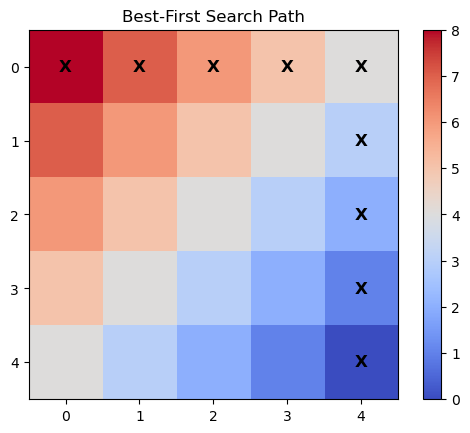

In [1]:
import heapq
import matplotlib.pyplot as plt
import numpy as np

def manhattan_distance(x1, y1, x2, y2):
    return abs(x1 - x2) + abs(y1 - y2)

def best_first_search(grid, start, treasure):
    rows, cols = len(grid), len(grid[0])
    visited = set()
    priority_queue = []
    heapq.heappush(priority_queue, (grid[start[0]][start[1]], start))
    path = []
    
    while priority_queue:
        _, (x, y) = heapq.heappop(priority_queue)
        
        if (x, y) in visited:
            continue
        
        visited.add((x, y))
        path.append((x, y))
        
        if (x, y) == treasure:
            return path
        
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < rows and 0 <= ny < cols and (nx, ny) not in visited:
                heuristic = manhattan_distance(nx, ny, treasure[0], treasure[1])
                heapq.heappush(priority_queue, (heuristic, (nx, ny)))
    
    return path  # Returns path explored if treasure not found

def visualize_grid(grid, path):
    grid_np = np.array(grid)
    plt.imshow(grid_np, cmap='coolwarm', interpolation='nearest')
    
    for (x, y) in path:
        plt.text(y, x, 'X', ha='center', va='center', color='black', fontsize=12, fontweight='bold')
    
    plt.xticks(range(len(grid[0])))
    plt.yticks(range(len(grid)))
    plt.title("Best-First Search Path")
    plt.colorbar()
    plt.show()

# Example grid and test
rows, cols = 5, 5
treasure = (4, 4)
start = (0, 0)
grid = [[manhattan_distance(r, c, treasure[0], treasure[1]) for c in range(cols)] for r in range(rows)]

path_taken = best_first_search(grid, start, treasure)
print("Path to Treasure:", path_taken)

visualize_grid(grid, path_taken)


In [ ]:
plmoknij